In [618]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

%matplotlib inline

In [619]:
sns.set_theme(style="whitegrid")

In [620]:
vocabStd = np.array([
    [8.89, 0],
    [0, 5.89]
])

grammarStd = np.array([
    [8.26, 0],
    [0, 5.26]
])

In [621]:
standardVocabMean = [65.74, 69.04]
standardGrammarMean = [59.52, 63.5]

In [622]:
improvedVocabMean = [65.74, 75.6]
improvedGrammarMean = [59.52, 70.45]

In [623]:
# specify desired correlation
correlations = np.array([
    [1, .7],
    [.8, 1]
])

# calc desired covariance (vc matrix)
vocabCov = np.dot(vocabStd, np.dot(correlations, vocabStd))
grammarCov = np.dot(grammarStd, np.dot(correlations, grammarStd))

In [624]:
vocabCov

array([[79.0321 , 47.12589],
       [47.12589, 34.6921 ]])

In [625]:
grammarCov

array([[68.2276 , 39.10284],
       [39.10284, 27.6676 ]])

Initial Language Test

In [626]:
d = {
    'student': [], 
    'initial_vocabulary_score': [], 
    'final_vocabulary_score': [], 
    'initial_grammar_score': [], 
    'final_grammar_score': []
}

standardGroupDf = pd.DataFrame(data=d)
improvedGroupDf = pd.DataFrame(data=d)

In [627]:
for i in range(1, 17):
    [[initialVocabScore, finalVocabScore]] = np.random.multivariate_normal(standardVocabMean, vocabCov, 1)
    [[initialGrammarScore, finalGrammarScore]] = np.random.multivariate_normal(standardGrammarMean, grammarCov, 1)

    standardGroupDf = standardGroupDf.append({
        'student': 'Student ' + str(i), 
        'initial_vocabulary_score': initialVocabScore, 
        'final_vocabulary_score': finalVocabScore,
        'initial_grammar_score': initialGrammarScore,
        'final_grammar_score': finalGrammarScore,
    }, ignore_index=True)

In [628]:
for i in range(17, 33):
    [[initialVocabScore, finalVocabScore]] = np.random.multivariate_normal(improvedVocabMean, vocabCov, 1)
    [[initialGrammarScore, finalGrammarScore]] = np.random.multivariate_normal(improvedGrammarMean, grammarCov, 1)

    improvedGroupDf = improvedGroupDf.append({
        'student': 'Student ' + str(i), 
        'initial_vocabulary_score': initialVocabScore, 
        'final_vocabulary_score': finalVocabScore,
        'initial_grammar_score': initialGrammarScore,
        'final_grammar_score': finalGrammarScore,
    }, ignore_index=True)

Language Test Results

In [629]:
standardGroupDf

,student,initial_vocabulary_score,final_vocabulary_score,initial_grammar_score,final_grammar_score
0,Student 1,78.023686,77.034119,36.346378,49.987507
1,Student 2,67.719269,69.145798,62.149847,65.801168
2,Student 3,65.611540,64.296330,56.401873,65.238879
3,Student 4,56.015336,64.491917,66.350529,64.955477
4,Student 5,59.250152,61.337162,56.242923,62.320771
5,Student 6,72.665293,72.687488,70.875875,71.928689
6,Student 7,87.973231,88.428330,56.708868,63.702973
7,Student 8,75.087040,79.248589,60.581743,62.554728
8,Student 9,65.702800,72.065753,69.796530,68.292017
9,Student 10,64.592991,63.664057,71.240094,66.621091


In [630]:
improvedGroupDf

,student,initial_vocabulary_score,final_vocabulary_score,initial_grammar_score,final_grammar_score
0,Student 17,54.443025,65.849147,60.323632,73.366010
1,Student 18,61.102088,72.631742,70.260928,75.677943
2,Student 19,67.257497,76.872252,57.396102,70.210753
3,Student 20,56.158259,71.929995,71.385117,78.668742
4,Student 21,75.413026,81.202419,66.240525,74.194486
5,Student 22,73.366208,82.648764,69.926458,74.099631
6,Student 23,62.085380,73.519918,56.650393,70.089258
7,Student 24,66.874858,74.622975,79.015183,83.059111
8,Student 25,66.082582,78.161921,62.456149,72.703876
9,Student 26,84.563719,88.312098,53.742214,68.733420


Outliners

In [631]:
standardGroupDf.describe()

,initial_vocabulary_score,final_vocabulary_score,initial_grammar_score,final_grammar_score
count,16.000000,16.000000,16.000000,16.000000
mean,68.513675,70.771221,62.481279,64.998209
std,8.023083,7.087830,8.593963,4.911592
min,56.015336,61.337162,36.346378,49.987507
25%,64.931244,64.662989,59.613524,63.415912
50%,66.007167,70.469356,63.757433,65.520023
75%,73.270730,73.658938,68.359766,66.818493
max,87.973231,88.428330,71.240094,71.928689


In [632]:
improvedGroupDf.describe()

,initial_vocabulary_score,final_vocabulary_score,initial_grammar_score,final_grammar_score
count,16.000000,16.000000,16.000000,16.000000
mean,67.748235,77.128505,62.901835,72.441724
std,7.376789,5.296494,10.557413,6.393950
min,54.443025,65.849147,32.274031,53.081847
25%,63.666244,73.393671,58.088498,70.180379
50%,68.432720,77.517086,64.890296,73.580073
75%,70.965169,80.085187,70.010076,75.714828
max,84.563719,88.312098,79.015183,83.059111


In [633]:
standardGroupDf[
    (standardGroupDf['initial_vocabulary_score'] > standardGroupDf['final_vocabulary_score']) | 
    (standardGroupDf['initial_grammar_score'] > standardGroupDf['final_grammar_score'])
]

,student,initial_vocabulary_score,final_vocabulary_score,initial_grammar_score,final_grammar_score
0,Student 1,78.023686,77.034119,36.346378,49.987507
2,Student 3,65.611540,64.296330,56.401873,65.238879
3,Student 4,56.015336,64.491917,66.350529,64.955477
8,Student 9,65.702800,72.065753,69.796530,68.292017
9,Student 10,64.592991,63.664057,71.240094,66.621091
10,Student 11,65.043994,64.720013,65.265045,67.028039
12,Student 13,66.275149,70.065226,68.539895,65.917663
13,Student 14,77.138863,76.573287,68.299723,66.748645


In [634]:
improvedGroupDf[
    (improvedGroupDf['initial_vocabulary_score'] > improvedGroupDf['final_vocabulary_score']) | 
    (improvedGroupDf['initial_grammar_score'] > improvedGroupDf['final_grammar_score'])
]

,student,initial_vocabulary_score,final_vocabulary_score,initial_grammar_score,final_grammar_score


<AxesSubplot:title={'center':'Final Grammar Exam'}, xlabel='final_grammar_score', ylabel='Count'>

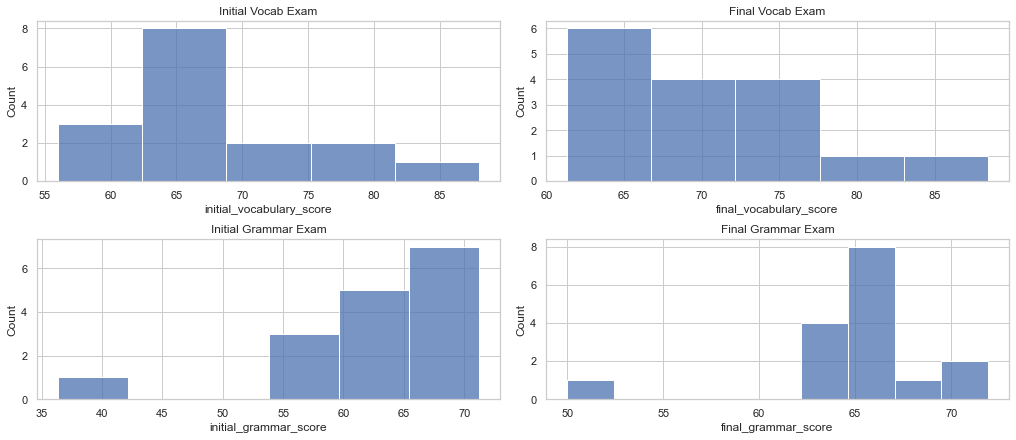

In [635]:
fig, ax = plt.subplots(2, 2, figsize=(14, 6), constrained_layout=True)

ax[0, 0].set_title('Initial Vocab Exam')
sns.histplot(standardGroupDf, x="initial_vocabulary_score", ax=ax[0, 0])

ax[0, 1].set_title('Final Vocab Exam')
sns.histplot(standardGroupDf, x="final_vocabulary_score", ax=ax[0, 1])

ax[1, 0].set_title('Initial Grammar Exam')
sns.histplot(standardGroupDf, x="initial_grammar_score", ax=ax[1, 0])

ax[1, 1].set_title('Final Grammar Exam')
sns.histplot(standardGroupDf, x="final_grammar_score", ax=ax[1, 1])

<AxesSubplot:title={'center':'Final Grammar Exam'}, xlabel='final_grammar_score', ylabel='Count'>

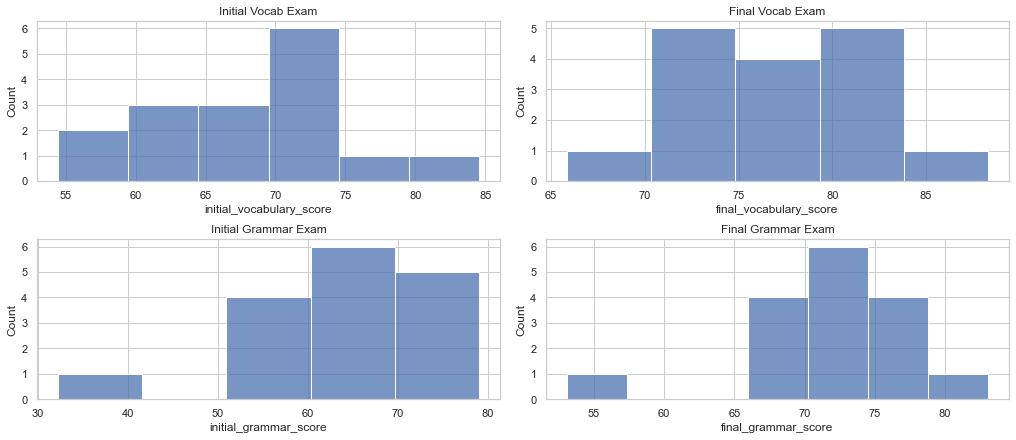

In [636]:
fig, ax = plt.subplots(2, 2, figsize=(14, 6), constrained_layout=True)

ax[0, 0].set_title('Initial Vocab Exam')
sns.histplot(improvedGroupDf, x="initial_vocabulary_score", ax=ax[0, 0])

ax[0, 1].set_title('Final Vocab Exam')
sns.histplot(improvedGroupDf, x="final_vocabulary_score", ax=ax[0, 1])

ax[1, 0].set_title('Initial Grammar Exam')
sns.histplot(improvedGroupDf, x="initial_grammar_score", ax=ax[1, 0])

ax[1, 1].set_title('Final Grammar Exam')
sns.histplot(improvedGroupDf, x="final_grammar_score", ax=ax[1, 1])

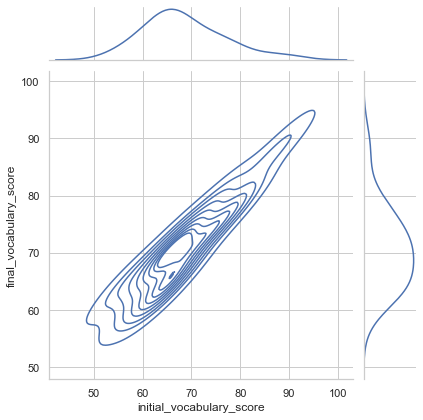

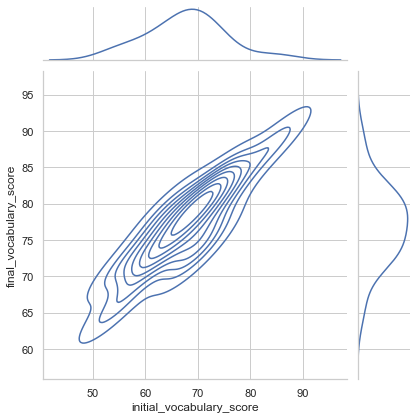

In [637]:
sns.jointplot(
    data=standardGroupDf,
    x="initial_vocabulary_score", y="final_vocabulary_score",
    kind="kde",
)
sns.jointplot(
    data=improvedGroupDf,
    x="initial_vocabulary_score", y="final_vocabulary_score",
    kind="kde"
)

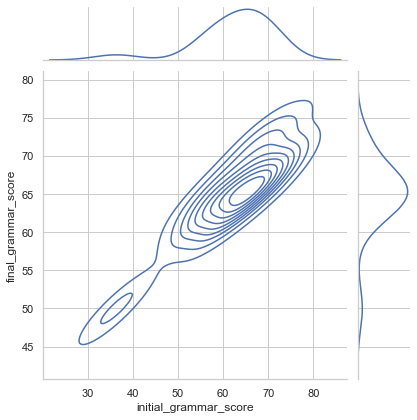

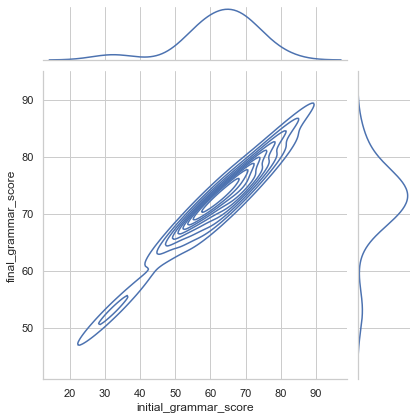

In [638]:
sns.jointplot(
    data=standardGroupDf,
    x="initial_grammar_score", y="final_grammar_score",
    kind="kde",
)
sns.jointplot(
    data=improvedGroupDf,
    x="initial_grammar_score", y="final_grammar_score",
    kind="kde"
)

In [639]:
standardGroupDf.to_csv('tmp/standard-group.csv', index=False)
improvedGroupDf.to_csv('tmp/standard-group.csv', index=False)